## Importing Modules 

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from flask import Flask, render_template, request
import numpy as np
import pickle

## Loading Dataset 

In [156]:
data = pd.read_csv(r"C:\Users\ARYAN\Downloads\loan_approval_dataset.csv")
data.head(5) 

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## EDA 

In [157]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [158]:
data.describe() 

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [159]:
data.isnull().sum() 

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

## Replacing String Values using Label Encoding 

The List of Columns having string values are - 

1. education 

2. self_employed

3. loan_status 

In [160]:
data.columns=data.columns.str.strip()
data['education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [161]:
data['self_employed'].unique()

array([' No', ' Yes'], dtype=object)

In [162]:
data['loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [163]:
data['education'] = data['education'].replace([' Graduate', ' Not Graduate'], [1, 0])
data['self_employed'] = data['self_employed'].replace([' Yes', ' No'], [1, 0])
data['loan_status'] = data['loan_status'].replace([' Approved', ' Rejected'], [1, 0]) 

C:\Users\ARYAN\AppData\Local\Temp\ipykernel_13364\1982064399.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['education'] = data['education'].replace([' Graduate', ' Not Graduate'], [1, 0])
C:\Users\ARYAN\AppData\Local\Temp\ipykernel_13364\1982064399.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['self_employed'] = data['self_employed'].replace([' Yes', ' No'], [1, 0])
C:\Users\ARYAN\AppData\Local\Temp\ipykernel_13364\1982064399.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be rem

In [164]:
data['education'].unique()

array([1, 0], dtype=int64)

In [165]:
data['self_employed'].unique()

array([0, 1], dtype=int64)

In [166]:
data['loan_status'].unique()

array([1, 0], dtype=int64)

## Building the Model 

In [167]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report 

In [168]:
model = DecisionTreeClassifier()

In [169]:
X = data.drop(['loan_id', 'loan_status'], axis = 1)
y = data['loan_status'] 

In [170]:
# new_X.columns

In [171]:

scaler=StandardScaler()
new_X=X[['education','self_employed','no_of_dependents']]
X=X.drop(columns=['education','self_employed','no_of_dependents'])
scaler.fit(X)
scaled_X=scaler.transform(X)

In [172]:
scaled_X=pd.DataFrame(scaled_X,columns=X.columns)
new_X=pd.concat([scaled_X,new_X],axis=1)

In [173]:
new_X

,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education,self_employed,no_of_dependents
0,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304,1,0,2
1,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936,0,1,0
2,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316,1,0,3
3,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533,1,0,3
4,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...
4264,-1.446324,-1.419268,0.192617,-1.641063,-0.718546,-1.019301,-1.299210,-1.285213,1,1,5
4265,-0.626801,-0.423946,1.594031,-0.237434,-0.503257,-0.472412,-0.453306,-0.946732,0,1,0
4266,0.513405,0.969504,1.243677,-0.829046,-0.964591,1.692361,0.326683,0.714907,0,0,2
4267,-0.341750,-0.258059,-0.508091,1.044393,0.111856,-0.973727,-0.112748,0.253341,0,0,1


In [174]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, random_state=42, test_size=0.3) 

In [175]:
model.fit(X_train, y_train) 

DecisionTreeClassifier()

In [176]:
prediction = model.predict(X_test) 

In [177]:
accuracy_score(y_test, prediction) * 100 

97.50195160031225

In [178]:
print(classification_report(y_test, prediction)) 

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       471
           1       0.97      0.99      0.98       810

    accuracy                           0.98      1281
   macro avg       0.98      0.97      0.97      1281
weighted avg       0.98      0.98      0.97      1281



## Checking Accuracy for Multiple Models 

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier 

In [ ]:
# models = {'DecisionTreeClassifier': DecisionTreeClassifier(),
#          'LogisticRegression': LogisticRegression(),
#          'RandomForestClassifier': RandomForestClassifier(),
#          'XGBClassifier': XGBClassifier()}

models={'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=3),
         'LogisticRegression': LogisticRegression(),
         'RandomForestClassifier': RandomForestClassifier(),
         }

for model_name, mod in models.items():
    print(f"\nChecking for {model_name}")
    model = mod
    
    model.fit(X_train, y_train)
    
    prediction = model.predict(X_test) 
    
    print(f"Accuracy Score - {accuracy_score(y_test, prediction) * 100 }\n")
    print(classification_report(y_test, prediction)) 




Checking for DecisionTreeClassifier
Accuracy Score - 94.92583918813428

              precision    recall  f1-score   support

           0       0.88      0.99      0.94       471
           1       1.00      0.92      0.96       810

    accuracy                           0.95      1281
   macro avg       0.94      0.96      0.95      1281
weighted avg       0.95      0.95      0.95      1281


Checking for LogisticRegression
Accuracy Score - 90.32006245120999

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       471
           1       0.92      0.92      0.92       810

    accuracy                           0.90      1281
   macro avg       0.90      0.90      0.90      1281
weighted avg       0.90      0.90      0.90      1281


Checking for RandomForestClassifier
Accuracy Score - 97.65807962529274

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       471
           1       0.9

## Saving Model 

Since DecisionTreeClassifier has given the best accuracy, we will use it for building the API 

In [243]:
model = DecisionTreeClassifier(max_depth=3)

In [244]:
model.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [245]:
import pickle
import joblib

In [246]:
with open("final_model.pkl", "wb") as f:
    pickle.dump(model, f)
    
joblib.dump(model, "final_model.joblib") 

['final_model.joblib']

In [247]:
new_X

,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education,self_employed,no_of_dependents
0,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304,1,0,2
1,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936,0,1,0
2,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316,1,0,3
3,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533,1,0,3
4,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...
4264,-1.446324,-1.419268,0.192617,-1.641063,-0.718546,-1.019301,-1.299210,-1.285213,1,1,5
4265,-0.626801,-0.423946,1.594031,-0.237434,-0.503257,-0.472412,-0.453306,-0.946732,0,1,0
4266,0.513405,0.969504,1.243677,-0.829046,-0.964591,1.692361,0.326683,0.714907,0,0,2
4267,-0.341750,-0.258059,-0.508091,1.044393,0.111856,-0.973727,-0.112748,0.253341,0,0,1


In [248]:
test_data =  list(scaler.transform([[ 10000000, 100000, 2, 800, 100000, 100000, 100000, 100000]])[0])
# test_data.append([1,1,4])

c:\Users\ARYAN\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [249]:
test_data.append(1)
test_data.append(1)
test_data.append(4)


In [250]:
test_data=np.array(test_data)
test_data.reshape(1,-1)

array([[ 1.76050476, -1.66256862, -1.55915146,  1.16039506, -1.13374727,
        -1.11044972, -1.65075492, -1.50061097,  1.        ,  1.        ,
         4.        ]])

In [251]:
loaded_model = joblib.load("final_model.joblib") 

In [252]:
loaded_model.predict([test_data]) 

c:\Users\ARYAN\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [253]:
import sklearn; print(sklearn.__version__) 

1.5.1


In [254]:
# !pip install --upgrade scikit-learn 

In [255]:
# !pip uninstall scikit-learn 

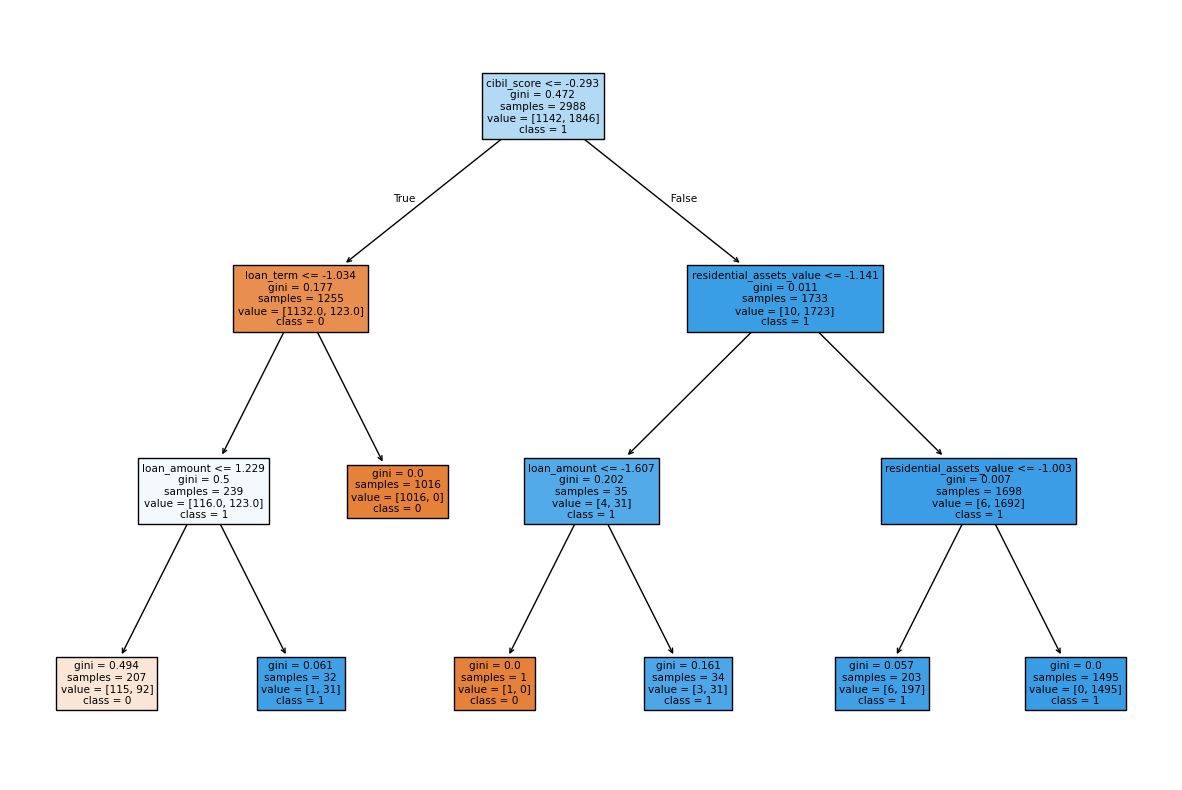

In [256]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=new_X.columns, class_names=["0", "1"], filled=True)
plt.show()

. Model Performance Comparison
Decision Tree Classifier achieved an accuracy of 97.42%.
Logistic Regression achieved an accuracy of 90.24%.
The Decision Tree outperforms Logistic Regression again, maintaining a higher accuracy.
2. Precision, Recall, and F1-Score
Decision Tree Classifier

Class 0 (Rejected Loans)
Precision: 0.98
Recall: 0.95
F1-score: 0.96
Class 1 (Approved Loans)
Precision: 0.97
Recall: 0.99
F1-score: 0.98
Overall Accuracy: 97%
Weighted Avg F1-score: 97%
This suggests that the model is slightly misclassifying some rejected loans but correctly approving most loans.
Logistic Regression

Class 0 (Rejected Loans)
Precision: 0.86
Recall: 0.87
F1-score: 0.87
Class 1 (Approved Loans)
Precision: 0.92
Recall: 0.92
F1-score: 0.92
Overall Accuracy: 90%
Weighted Avg F1-score: 90%
The model has good balance, but it's less effective at distinguishing between approved and rejected loans compared to the Decision Tree.
3. Why Decision Tree Performs Better?
Captures Non-Linearity: Loan approval decisions often depend on complex non-linear relationships (e.g., income, loan amount, CIBIL score), which Decision Trees capture well.
Feature Interactions: Decision Trees naturally split the data based on important features without assuming a linear relationship.
Logistic Regression is Linear: If the loan approval process follows non-linear rules, Logistic Regression struggles to fit the data effectively.